In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.svm import SVC
%matplotlib inline

### Loading the Dataset

In [2]:
data_train = pd.read_csv("data/cardio_train.csv")
data_test = pd.read_csv("data/cardio_test.csv")

X_train = data_train.drop(data_train.columns[-1],axis=1)
y_train = data_train.iloc[:,-1]

X_test = data_test.drop(data_test.columns[-1],axis=1)
y_test = data_test.iloc[:,-1]
data_train.head()

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,-2.746331,0.674374,-0.203640,0.569296,-0.683598,-0.061401,-0.278295,1.161352,-0.862298,-0.420487,...,0.342006,-0.565334,-0.409388,-0.488279,-1.441887,-1.083848,-1.561651,-0.222985,-2.126605,0
1,-1.476526,-0.487369,-0.203640,0.159199,-0.127511,-0.061401,-0.278295,-1.171841,-0.051613,0.948799,...,-0.655829,-0.235325,-0.753395,2.414444,-0.600269,-0.828456,-0.940945,-0.323186,-0.493294,0
2,-0.312539,-0.380829,0.066072,-1.635871,-0.683598,-0.061401,-0.278295,0.144320,-0.630673,-0.420487,...,-1.368567,-0.455331,0.622631,-0.488279,-0.179460,0.001569,-0.182306,-0.556988,1.140018,0
3,-0.947441,3.464968,-0.203640,-0.961999,-0.683598,-0.061401,-0.278295,-1.231666,0.874885,-0.420487,...,0.342006,-0.675337,-1.097401,-0.488279,0.000886,0.001569,-0.113338,-0.523588,-0.493294,0
4,0.533997,-0.437880,-0.163445,0.697949,1.175504,-0.061401,-0.278295,0.802400,0.411636,-0.420487,...,-1.083472,0.094683,0.622631,-0.488279,0.181233,0.001569,0.300465,0.044218,1.140018,0


In [3]:
def svm(ker):
    #training the model
    svclassifier = SVC(kernel=ker, degree=5)
    svclassifier.fit(X_train, y_train)
    return svclassifier

## 1. Gaussian Kernel

### Training the model

In [5]:
#Gaussian Kernel
svclassifier = svm('rbf')

/Users/yanli/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


### Making predictions

In [6]:
y_pred = svclassifier.predict(X_test)

### Evaluating the result

In [7]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[329   3]
 [  1  34]]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       332
           1       0.92      0.97      0.94        35

    accuracy                           0.99       367
   macro avg       0.96      0.98      0.97       367
weighted avg       0.99      0.99      0.99       367



### Average_precision

In [8]:
y_scores = svclassifier.decision_function(X_test)
avg_prec = average_precision_score(y_test, y_scores)
print(avg_prec)

0.9897719087635055


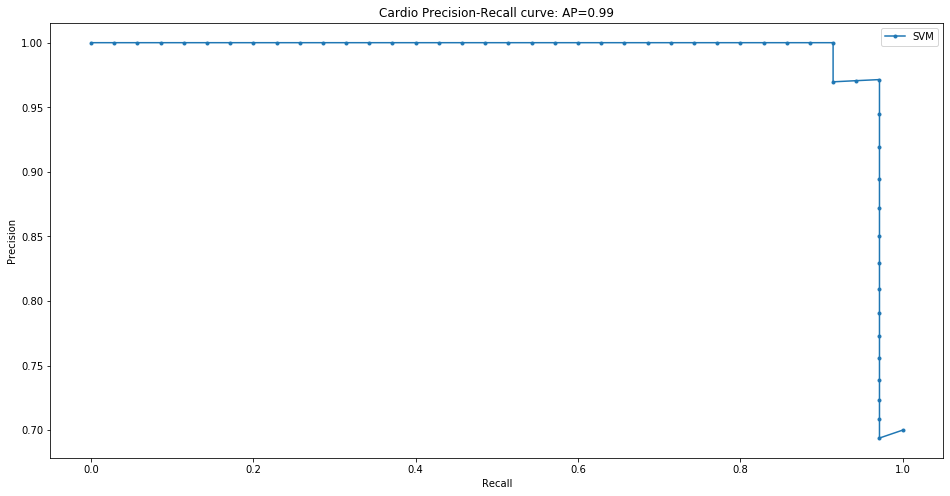

In [9]:
## Getting Precision Recall Curves
credit_prec, credit_recall, threshes = precision_recall_curve(y_test, y_scores)

plt.figure(figsize=(16, 8))
plt.plot(credit_recall, credit_prec, marker='.', label='SVM')

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title('Cardio Precision-Recall curve: '
                   'AP={0:0.2f}'.format(avg_prec))
plt.legend()

## 2. Linear Kernel

### Training the model

In [10]:
#Linear Kernel
svclassifier = svm('linear')

### Making predictions

In [11]:
y_pred = svclassifier.predict(X_test)

### Evaluating the result

In [12]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[330   2]
 [  2  33]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       332
           1       0.94      0.94      0.94        35

    accuracy                           0.99       367
   macro avg       0.97      0.97      0.97       367
weighted avg       0.99      0.99      0.99       367



### Average_precision

In [13]:
y_scores = svclassifier.decision_function(X_test)
average_precision_score(y_test, y_scores)

0.9890720390720391

## 3. Polynomial Kernel

### Training the model

In [14]:
#Polynomial Kernel
svclassifier = svm('poly')

/Users/yanli/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


### Making predictions

In [15]:
y_pred = svclassifier.predict(X_test)

### Evaluating the result

In [16]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[331   1]
 [  1  34]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       332
           1       0.97      0.97      0.97        35

    accuracy                           0.99       367
   macro avg       0.98      0.98      0.98       367
weighted avg       0.99      0.99      0.99       367



### Average_precision

In [17]:
y_scores = svclassifier.decision_function(X_test)
average_precision_score(y_test, y_scores)

0.9600925561865812

## 4. Sigmoid Kernel

### Training the model

In [18]:
#Sigmoid Kernel
svclassifier = svm('sigmoid')

/Users/yanli/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


### Making predictions

In [19]:
y_pred = svclassifier.predict(X_test)

### Evaluating the result

In [20]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[309  23]
 [ 25  10]]
              precision    recall  f1-score   support

           0       0.93      0.93      0.93       332
           1       0.30      0.29      0.29        35

    accuracy                           0.87       367
   macro avg       0.61      0.61      0.61       367
weighted avg       0.87      0.87      0.87       367



### Average_precision

In [21]:
y_scores = svclassifier.decision_function(X_test)
average_precision_score(y_test, y_scores)

0.22770131001233668